Je propose de mettre cette sous partie d'analyse en foncion de wine_type dans la partie analyse des variables car en vrai c'est pas partie du modèle. 

## 0 - Démarches préliminaires

### 0.a- Importation des librairies 

In [2]:
#general librairies
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

#sklearn librairies
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import *
from sklearn.ensemble import * 
from sklearn.svm import *
from sklearn.neighbors import KNeighborsRegressor


#appel a nos fonctions
from fcts_R.general import * 
from fcts_R.dataset_division import *

### 0.b - On télécharge le jeu de données train

In [95]:
#On charge le jeu de données
data = pd.read_csv("wine_train.csv")

Dans la suite, on va tenter de faire des regressions sur chaque type de vin

## 1 - Traitement du jeu de données 

### a- Séparation du jeu de données initial en fonction de wine_type

In [96]:
# on extrait indices dans lequels la variable "wine_type"= 0 (resp. = 1)
idx0, idx1 = winetype(data)

# on crée les jeu de données data0 et data1 à partir des indices 
data0, data1 = formal_div(data, idx0, idx1)

# On sépare les co-variables de la variable à prédire
X0,y0 = treatment(data0)
X1,y1 = treatment(data1)

### b - Séparation train/test: 
Cette division nous permettra d'évaluer les performances de nos modèles en contrôlant l'erreur test. 

In [97]:
#Data0: 
X_tr0, X_te0, y_tr0, y_te0= train_test_split(X0,y0, test_size=0.33,random_state=2023)

#Data1:
X_tr1, X_te1, y_tr1, y_te1= train_test_split(X1,y1, test_size=0.33,random_state=2023)

### c - Normalisation des co-variables
Cette démarche nous permettra d'éviter des problèmes d'unité 

In [98]:
#Pour data0: 
stdsc = StandardScaler()
X_tr_0 = stdsc.fit_transform(X_tr0)
X_te_0 = stdsc.transform(X_te0)

#Pour data1: 
stdsc = StandardScaler()
X_tr_1 = stdsc.fit_transform(X_tr1)
X_te_1 = stdsc.transform(X_te1)

## 2 - Selection et entrainement de modèles

### a - Technique de selection de co-variables
Dans la suivante section, on va selectionner les variables qui sont plus informatives dans le modèle. 

### b - Selection de paramètres et modèles basés sur la cross-validation

#### 1 - Méthodes d'ensembles 

##### Modèle entrainé sur data0

In [34]:
#param_grid = {"learning_rate":[0.01, 0.05,0.1,0.15]}
#mod = GradientBoostingRegressor(random_state=10, loss="huber", learning_rate= 0.15)
#Best Score:  0.3803194835261793; normal:  0.42591544979738993

#param_grid = {loss:['squared_error', 'absolute_error', 'poisson', 'quantile'],"learning_rate":[0.15,0.1,0.075]}
#mod = HistGradientBoostingRegressor(random_state=10, loss="poisson", learning_rate= 0.15)
#Best Score:  0.4212414218497866; normal:  0.46308119502761824

#param_grid = {'n_estimators': [1750,2000,2250]}
#mod = BaggingRegressor(random_state=10, n_estimators=2250)
# Best Hyperparameters:  {'n_estimators': 2250}; Best Score:  0.4322135469402454; normal:  0.492264824919702

pred0 = param_selection({'n_estimators': [900,1000,1100]}, ExtraTreesRegressor(random_state=50, max_samples=None), X_tr_0, y_tr0, X_te_0)
#Best Hyperparameters:  {'n_estimators': 1000}; Best Score:  0.44961232001775764; normal: 0.5157542381608193
print("normal: ", r2_score(y_te0, pred0))

/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_

Best Hyperparameters:  {'n_estimators': 1000}
Best Score:  0.44961232001775764
normal:  0.5157542381608193


##### Modèle entrainé sur data1

In [58]:
#param_grid = { 'n_estimators': [130,150,155,175] }
#mod = RandomForestRegressor(random_state=42, max_depth=None, min_samples_split=2)
#Best Hyperparameters:  {'n_estimators': 155}; Best Score:  0.452004089233481; normal:  0.4165095764361062

#param_grid = {'n_estimators': [400,500]}
#mod = BaggingRegressor(random_state=10)
#Best Hyperparameters:  {'n_estimators': 500}; Best Score:  0.4415537219663822; normal:  0.423645468210311


pred1 = param_selection({'n_estimators': [300,2750,100]}, ExtraTreesRegressor(random_state=50, max_samples=None), X_tr_1, y_tr1, X_te_1)
#Best Hyperparameters:  {'n_estimators': 2750}; Best Score:  0.4501857031786086; normal:  0.4434060275496192


print("normal: ", r2_score(y_te1, pred1))

/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_

#### 2- SVM

##### Modèle entrainé sur data0

In [34]:
# {'kernel': ["linear","poly","rbf", "sigmoid"], 'gamma':["scale", "auto"], 'epsilon':[0.05,0.1,0.15], 'C': [0.5,1,1.5]}
#Best Hyperparameters:  {'C': 1, 'epsilon': 0.15, 'gamma': 'scale', 'kernel': 'rbf'}; Best Score:  0.37465693229921293; normal:  0.40728418982541437 

#{'degree': [1,2,3,4,5,6]}, SVR(kernel="poly", gamma="scale", epsilon=0.15)
#Best Hyperparameters:  {'degree': 1}; Best Score:  0.26182202519203174; normal:  0.3233410341186739

#{'degree': [1,2,3,4,5,6], 'coef0': [0.0, 0.01, 0.1, 0.5, 0.75,1]}, SVR(kernel="poly", gamma="scale", epsilon=0.15)
#Best Hyperparameters:  {'coef0': 1, 'degree': 2}; Best Score:  0.31889755456529084; normal:  0.26912361991020595

#{'C': [0.75,0.9,1,1.1,1.25]}, SVR(kernel="rbf", gamma="scale", epsilon=0.15)
#Best Hyperparameters:  {'C': 1}; Best Score:  0.37465693229921293; normal:  0.40728418982541437

#{'loss': ["epsilon_insensitive", "squared_epsilon_insensitive"], 'epsilon': [0,0.01,0.05,0.1,0.2,0.5],  'C': [0.5,1,1.5]},LinearSVR()
# Best Hyperparameters:  {'C': 1.5, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive'}; Best Score:  0.26364596987343536; normal:  0.3142987698900451

#MEILLEURE METHODE ICI mais pire que ensembles 
#{'kernel': ["linear","poly","rbf", "sigmoid"], 'gamma':["scale", "auto"], 'nu':[0.25,0.4,0.5,0.6,0.75,1], 'C': [0.5,1,1.5]}, NuSVR()
# Best Hyperparameters:  {'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.6}; Best Score:  0.3825024346626745; normal:  0.4170237776338953
pred0 = param_selection({'kernel': ["linear","poly","rbf", "sigmoid"], 'gamma':["scale", "auto"], 'nu':[0.25,0.4,0.5,0.6,0.75,1], 'C': [0.5,1,1.5]}, NuSVR(), X_tr_0, y_tr0, X_te_0)

print("normal: ", r2_score(y_te0, pred0))

/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/

Best Hyperparameters:  {'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.6}
Best Score:  0.3825024346626745
normal:  0.4170237776338953


##### Modèle entrainé sur data1

In [32]:
# # {'kernel': ["linear","poly","rbf", "sigmoid"], 'gamma':["scale", "auto"], 'epsilon':[0.05,0.1,0.15], 'C': [0.5,1,1.5]}
#Best Hyperparameters:  {'C': 0.5, 'epsilon': 0.15, 'gamma': 'scale', 'kernel': 'rbf'}; Best Score:  0.38254295487849943; normal:  0.3614347851687252

#'C': [0.6,0.65,0.7]}, SVR(kernel="rbf", epsilon=0.15, gamma="scale")
#Best Hyperparameters:  {'C': 0.65}; Best Score:  0.3831730279599518; normal:  0.36152163238602064

#MEILLEURE METHODE ici mais pire qu'ensembles 
#{'kernel': ["linear","poly","rbf", "sigmoid"], 'gamma':["scale", "auto"], 'nu':[0.25,0.4,0.5,0.6,0.75,1], 'C': [0.5,1,1.5]}, NuSVR()
# Best Hyperparameters:  {'C': 1.5, 'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.5}; Best Score:  0.39221647381690916; normal:  0.3605785220777057

#{'loss': ["epsilon_insensitive", "squared_epsilon_insensitive"], 'epsilon': [0,0.01,0.05,0.1,0.2,0.5],  'C': [0.5,1,1.5]},LinearSVR()
#Best Hyperparameters:  {'C': 1, 'epsilon': 0.2, 'loss': 'epsilon_insensitive'}; Best Score:  0.35164906667398566; normal:  0.35507025030214423
pred1 = param_selection({'loss': ["epsilon_insensitive", "squared_epsilon_insensitive"], 'epsilon': [0,0.01,0.05,0.1,0.2,0.5],  'C': [0.5,1,1.5]},LinearSVR(), X_tr_1, y_tr1, X_te_1)

print("normal: ", r2_score(y_te1, pred1))

/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to co

Best Hyperparameters:  {'C': 1, 'epsilon': 0.2, 'loss': 'epsilon_insensitive'}
Best Score:  0.35164906667398566
normal:  0.35507025030214423


/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/laurafuentesvicente/opt/anaconda3/envs/datachallenge/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Selection de covariables

In [7]:
model0 = ExtraTreesRegressor(random_state=50, max_samples=None, n_estimators=1000, bootstrap=True)
model0.fit(X_tr_0, y_tr0)

model1 = ExtraTreesRegressor(random_state=50, max_samples=None, n_estimators=2750, bootstrap=True)
model1.fit(X_tr_1,y_tr1)

/var/folders/30/cz4hwnjn49sbv5x54df4kt4m0000gn/T/ipykernel_37518/2052256981.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model0.fit(X_tr_0, y_tr0)
/var/folders/30/cz4hwnjn49sbv5x54df4kt4m0000gn/T/ipykernel_37518/2052256981.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_tr_1,y_tr1)


ExtraTreesRegressor(bootstrap=True, n_estimators=2750, random_state=50)

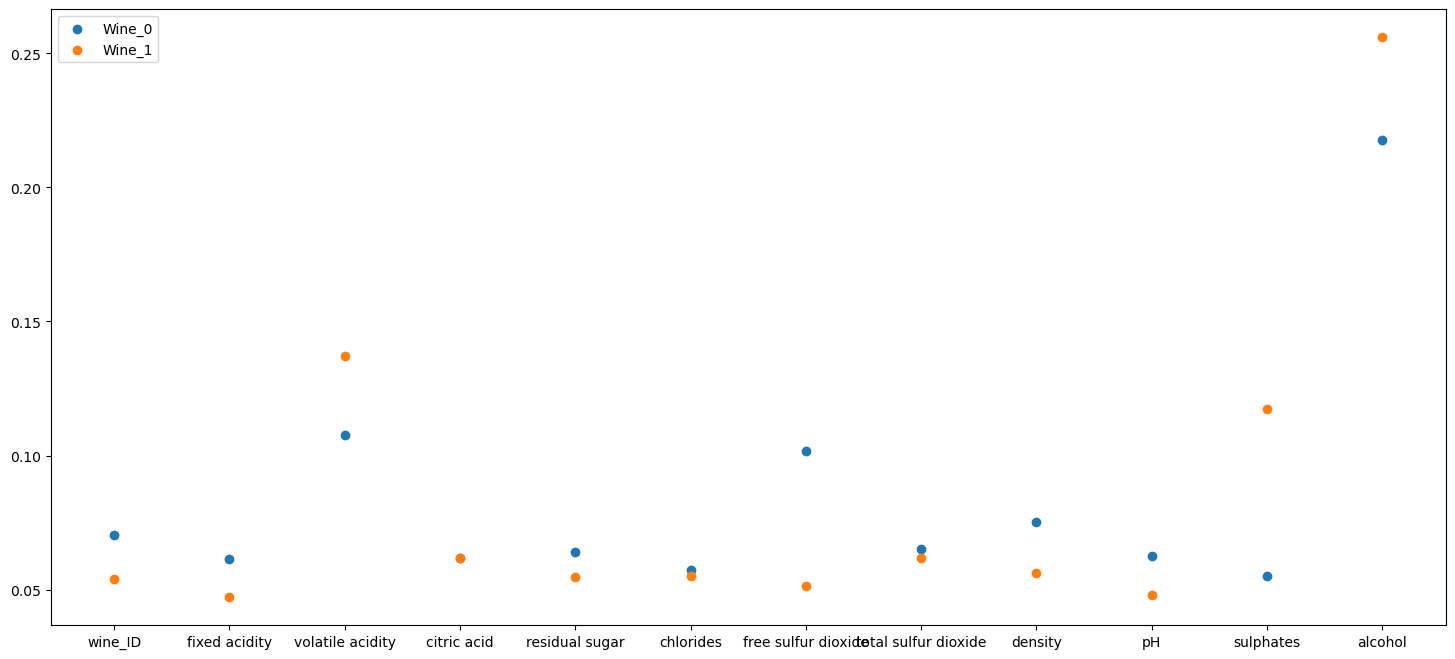

In [8]:
fig, ax = plt.subplots(figsize=(18,8))
plt.scatter(X_tr0.columns ,model0.feature_importances_, label="Wine_0")
plt.scatter(X_tr1.columns ,model1.feature_importances_, label="Wine_1")
plt.legend()

Pour chaque dataset, on va choisir les covariables a plus grande importance

In [104]:
#on peut ajouter: data0 (density)

XTR0 = X_tr0[X_tr0.columns[np.where(model0.feature_importances_>0.10)[0]]]
XTE0 = X_te0[X_tr0.columns[np.where(model0.feature_importances_>0.10)[0]]]

XTR1 = X_tr1[X_tr1.columns[np.where(model1.feature_importances_>0.07)[0]]]
XTE1 = X_te1[X_tr1.columns[np.where(model1.feature_importances_>0.07)[0]]]

Régression Lineaire

In [96]:
#pred_SVM1 = param_selection({'kernel': ["linear","poly","rbf"], 'epsilon':[0.01,0.1,0.2]}, SVR(gamma="auto"), XTR1, y_tr1, XTE1)
# Best Hyperparameters:  {'epsilon': 0.2, 'kernel': 'poly'}; Best Score:  0.36715233355757093; normal:  0.3341552432554715

#pred_1 = pred_SVM1 = param_selection({'degree': [1,2,3,4]}, SVR(gamma="auto", kernel="poly", epsilon=0.2), XTR1, y_tr1, XTE1)
#Best Hyperparameters:  {'degree': 3}; Best Score:  0.36715233355757093; normal:  0.3341552432554715

#pred_KNN1 = param_selection({'n_neighbors': [5,10,12,15,17,20], 'n_jobs':[1,2,3]}, KNeighborsRegressor(), XTR1, y_tr1, XTE1)
#Best Hyperparameters:  {'n_jobs': 1, 'n_neighbors': 12}; Best Score:  0.35310334915244407; normal:  0.323361965729962

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [34]:
print(X_tr0.columns[np.where(model0.feature_importances_>0.10)[0]])

print(X_tr1.columns[np.where(model1.feature_importances_>0.10)[0]])

print(X_tr1.columns)

Index(['volatile acidity', 'free sulfur dioxide', 'alcohol'], dtype='object')
Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')
Index(['wine_ID', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [80]:
data1 = data.copy()
stdsc = StandardScaler()
data1 = pd.DataFrame(stdsc.fit_transform(data1), columns=data.columns)
data1 = data1.rename(columns={"volatile acidity":"volatile_acidity", "free sulfur dioxide": "free_sulfur_dioxide", "fixed acidity": "fixed_acidity", "citric acid": "citric_acid", "residual sugar":"residual_sugar", "total sulfur dioxide": "total_sulfur_dioxide"})

X = data1[data1.columns[0:-1]]
y=data1["target"]
X_tr, X_te, y_tr, y_te= train_test_split(X,y, test_size=0.33,random_state=2023)

X_tr["target"] = y_tr

In [145]:
import statsmodels.api as sm

model_formula = "target ~ alcohol*wine_type + sulphates*wine_type + pH + density*wine_type + free_sulfur_dioxide*wine_type + volatile_acidity*wine_type + fixed_acidity+ + citric_acid + wine_ID + residual_sugar*wine_type "
# Define the model
model = sm.OLS.from_formula(model_formula, data=X_tr)

# Fit the model
results = model.fit()

# View the regression summary
print(results.summary())

y_pred = results.predict(X_te)
r2_score(y_te, y_pred)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     84.08
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          6.13e-239
Time:                        20:38:22   Log-Likelihood:                -3750.4
No. Observations:                3046   AIC:                             7537.
Df Residuals:                    3028   BIC:                             7645.
Df Model:                          17                                         
Covariance Type:            nonrobust  

0.3105774575524973

### Entrainement du modèle sélectionné et prediction sur X_test

On entraine nos modèles sélectionnés sur l'ensemble des données puis on crée une soumission

On crée d'abord X_test0 (avec que des vins de type 0), et X_test1 (resp. vins de type 1) pour pouvoir créer nos prédictions

In [ ]:
#On telecharge X_test
X_test = pd.read_csv("wine_test.csv")

idxtest0, idxtest1 = winetype(X_test)
X_test0, X_test1 = formal_div(X_test, idxtest0, idxtest1)

In [20]:
#Data0: 
mod0 = ExtraTreesRegressor(random_state=50, max_samples=None, n_estimators=1000)
mod0.fit(X0,y0)
pred0 = mod0.predict(X_test0)


#Data1: 
mod1 = ExtraTreesRegressor(random_state=50, max_samples=None, n_estimators=2750)
mod1.fit(X1,y1)
pred1 = mod1.predict(X_test1)

#Creation 
pred = build_pred(X_test0, X_test1, pred0,pred1)

/var/folders/30/cz4hwnjn49sbv5x54df4kt4m0000gn/T/ipykernel_12692/228695055.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod0.fit(X0,y0)
/var/folders/30/cz4hwnjn49sbv5x54df4kt4m0000gn/T/ipykernel_12692/228695055.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod1.fit(X1,y1)


In [21]:
import csv

    # Nommez les colonnes
column_names = ['wine_ID', 'target']
    # Spécifiez le nom du fichier CSV de sortie
csv_filename = 'submissions_R/'+'ExtraTrees_01'+'_'+'0010'+'.csv'
    # Ouvrez le fichier CSV en mode écriture et écrivez les données
with open(csv_filename, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
        # Écrivez les noms des colonnes
    writer.writerow(column_names)
        # Écrivez les données
    writer.writerows(pred)

In [ ]:
https://www.kaggle.com/code/qusaybtoush1990/wine-quality 